<a href="https://colab.research.google.com/github/Pilo1961/QuestionAnswer_System/blob/master/code/read_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de Preguntas y Respuestas
## Métodos Analíticos

## Dataset SQuAD version 1
### Notebook setup

In [0]:
import numpy as np
import pandas as pd
import json
import pickle

In [4]:
#load data from google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Read data

El set de entrenamiento es una archivo .json anidado.

En el primer nivel tiene dos columnas, titulo y otra llamada paragraph que consta de data en diccionarios.

In [13]:
# Lectura de datos
path= "/content/drive/My Drive/QA/train-v1.0.json"
with open(path) as f: 
    d = json.load(f) 

df = pd.json_normalize(d['data'])  
print(test.shape)
df.head()

(442, 2)


,paragraphs,title
0,"[{'context': 'Architecturally, the school has ...",University_of_Notre_Dame
1,[{'context': 'Beyoncé Giselle Knowles-Carter (...,Beyoncé
2,[{'context': 'Montana i/mɒnˈtænə/ is a state i...,Montana
3,"[{'context': 'The phrase ""in whole or in part""...",Genocide
4,[{'context': 'The emergence of resistance of b...,Antibiotics


## Datos

Los datos los leemos en un archivo json anidado de varios nivles. La estructura del archivo es la siguiente

+ Titulo
+ Paragraph 
    + Context
    + Qas
        + Id
        + Question
        + Answers
            + Text
            + Answer start
  

En las siguientes celdas observamos los diferentes niveles de anidacióón de los datos.

Los datos contienen 87636 preguntas para el set de entrenamiento y no contiene valores nulos. 

Las preguntas son de 18891 contextos diferentes.

In [14]:
df=pd.json_normalize(data=d['data'],record_path=['paragraphs'],meta=['title'])
df.head()

,context,qas,title
0,"Architecturally, the school has a Catholic cha...","[{'answers': [{'answer_start': 515, 'text': 'S...",University_of_Notre_Dame
1,"As at most other universities, Notre Dame's st...","[{'answers': [{'answer_start': 248, 'text': 'S...",University_of_Notre_Dame
2,The university is the major seat of the Congre...,"[{'answers': [{'answer_start': 119, 'text': 'R...",University_of_Notre_Dame
3,The College of Engineering was established in ...,"[{'answers': [{'answer_start': 487, 'text': 'e...",University_of_Notre_Dame
4,All of Notre Dame's undergraduate students are...,"[{'answers': [{'answer_start': 496, 'text': 'L...",University_of_Notre_Dame


Si abrimos paragraph tiene dos columnas:
  + qas - json anidado
  + context - Escrito con el contexto de la pregunta
  + title la obtenemos del nivel anterior

In [15]:
df=pd.json_normalize(data=d['data'],record_path=['paragraphs','qas'])#,meta=['title',['paragraph','context']])
df.head()

,answers,id,question
0,"[{'answer_start': 515, 'text': 'Saint Bernadet...",5733be284776f41900661182,To whom did the Virgin Mary allegedly appear i...
1,"[{'answer_start': 187, 'text': ' a copper stat...",5733be284776f4190066117f,What is in front of the Notre Dame Main Building?
2,"[{'answer_start': 279, 'text': 'the Main Build...",5733be284776f41900661180,The Basilica of the Sacred heart at Notre Dame...
3,"[{'answer_start': 381, 'text': 'a Marian place...",5733be284776f41900661181,What is the Grotto at Notre Dame?
4,"[{'answer_start': 92, 'text': 'a golden statue...",5733be284776f4190066117e,What sits on top of the Main Building at Notre...


Al abrir la columna qas encontramos 3 columnas mas
 + Question
 + Id
 + Answers - que es un json anidado

In [16]:
df=pd.json_normalize(data=d['data'],record_path=['paragraphs','qas','answers'])#,meta=['title',['paragraph','context']])
df.head()

,answer_start,text
0,515,Saint Bernadette Soubirous
1,187,a copper statue of Christ
2,279,the Main Building
3,381,a Marian place of prayer and reflection
4,92,a golden statue of the Virgin Mary


Finalmente, al abrir la columna de answers encontramos las columnas:
+ Answer_start - Información de la posición an la que comienza la respuesta.
+ Text - Respuesta a la pregunta

## Datos de entrenamiento
El dataset final de entrenamiento es:

In [56]:
df=pd.json_normalize(data=d['data'],
                        record_path=['paragraphs','qas','answers'],
                        record_prefix=None,
                        meta_prefix=None,
                        meta=['title',
                              ['paragraph','context'],
                              ['paragraph','qas','question'],
                              ['paragraph','qas','id']])

df.rename(columns={'paragraph.context':'context','paragraph.qas.question':'question','paragraph.qas.id':'id'},inplace=True)
print(df.shape)
df.head()

(87636, 6)


,answer_start,text,title,context,question,id
0,515,Saint Bernadette Soubirous,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182
1,187,a copper statue of Christ,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f
2,279,the Main Building,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180
3,381,a Marian place of prayer and reflection,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181
4,92,a golden statue of the Virgin Mary,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e


In [18]:
print("dimensiones df",df.shape)
print("Nas \n", df.isna().sum())

dimensiones df (87636, 6)
Nas 
 answer_start    0
text            0
title           0
context         0
question        0
id              0
dtype: int64


In [0]:
with open("/content/drive/My Drive/QA/df_train.pkl", 'wb') as handle:
    pickle.dump(df, handle)

# Análisis de los datos

In [24]:
from textblob import TextBlob
import matplotlib.pyplot as  plt
import nltk
nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
#creamos una lista con todos los contextos
contextos=df["context"].unique()
len(contextos)

18891

**Text blob** es una paqueteria en python que nos ayuda a procesar lenguaje natural. Tiene muchas funciones para analizar la sintáxis, tokenizar, hacer preprocesamiento, frecuencias, entre otras.

En el contexto de este análisis lo utilizamos para extraer las oraciones de los contextos y para contar las palabras y oraciones que tenemos.

In [0]:
# numero de oraciones por contexto
num_sent=[]
for i in range(len(contextos)):
  num_sent=np.append(num_sent, len(TextBlob(contextos[i]).sentences))

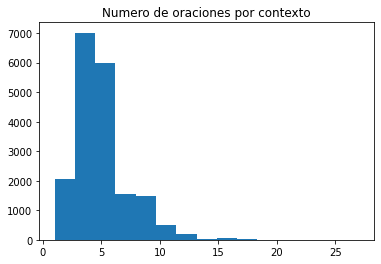

In [26]:
plt.hist(num_sent,bins=15)
plt.title("Numero de oraciones por contexto")
plt.show()

In [35]:
print(np.quantile(num_sent,.99))
pd.DataFrame(num_sent).describe()


12.0


,0
count,18891.000000
mean,4.953470
std,2.326159
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,27.000000


Observamos los estadísticos báscios del número de oraciones por contexto. 
La media es de 5 oraciones.
Observamos que el 99% de los contextos tiene 12 o menos oraciones.

In [37]:
#El número total de oraciones que tienen los contextos
sentence_corpus= TextBlob(" ".join(contextos)).sentences
len(sentence_corpus)

92659

También observamos que los contextos de entrenamiento tienen  un corpus de 2220093 palabras.  
Observamos que el promedio de palabras por oración es de 23.9 y que el 99% de las oraciones tienen menos de 63 palabras.

In [38]:
#Numero de palabras en todos los contextos
corpus= TextBlob(" ".join(contextos)).words
len(corpus)

2220093

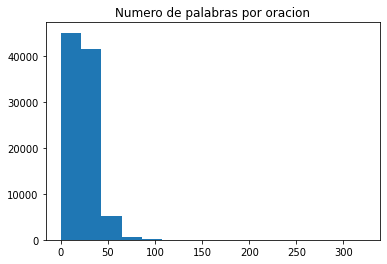

max=  323
min=  0


In [39]:
#palabras por oracion
word_sent=[len(sentence.words) for sentence in sentence_corpus]

plt.hist(word_sent,bins=15)
plt.title("Numero de palabras por oracion")
plt.show()

print("max= ",max(word_sent))
print("min= ",min(word_sent))

In [41]:
print(np.quantile(word_sent,.99))
pd.DataFrame(word_sent).describe()


63.0


,0
count,92659.000000
mean,23.959820
std,12.137481
min,0.000000
25%,16.000000
50%,22.000000
75%,30.000000
max,323.000000


## Embedding word2Vec

Probamos el embedding word2Vec

In [0]:
import torch
import cython
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [0]:
#Hace el corpus
data=[]
i=0
for cont in contextos: # para cada contexto
  sample=cont
  for sent in sent_tokenize(sample): #Extrae las oraciones
    temp=[]
    for j in word_tokenize(sent): #Estrae las palabras
      temp.append(j.lower())

    data.append(temp)

In [46]:
#La estructura que queda de data tiene la forma de lista de oraciones.
#Cada oracion es una lista de palabras
#Con este metodo tenemos 93576 oraciones, anteriormente teniamos 92659
#Tiene un 0.1% de variacion
print(len(data))
data[1]

93576


['atop',
 'the',
 'main',
 'building',
 "'s",
 'gold',
 'dome',
 'is',
 'a',
 'golden',
 'statue',
 'of',
 'the',
 'virgin',
 'mary',
 '.']

In [0]:
#entrena un modelo Word2Vec CBOW con nuestro corpus
model1 = gensim.models.Word2Vec(data, min_count = 1,  size = 100, window = 5,workers=8) 

In [48]:
#longitud del vocabulario
len(model1.wv.vocab)

97680

In [49]:
#La representaciones las podemos ver:
model1['building']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-0.53325254, -1.1205275 ,  0.447919  , -0.16391894,  1.1319224 ,
       -0.7087768 , -0.03862454, -0.63492316, -0.8012175 ,  0.40396783,
        0.59878665, -0.00822338, -0.43349317,  0.8104244 ,  0.09412549,
        1.3043555 ,  0.852056  ,  0.5326712 ,  0.5236839 ,  0.13958977,
       -0.08586107,  0.3186869 ,  1.1108162 ,  0.62419516,  0.3393669 ,
       -0.9630213 ,  0.60256934, -1.3430564 ,  0.14466654,  0.37595955,
       -0.7461374 , -0.9114267 ,  0.17378269,  1.369758  , -0.10141047,
       -0.15330894, -1.1978418 ,  0.11703686,  0.5602496 , -0.19608802,
       -0.19263071,  0.27364194,  0.6356784 , -0.17845902,  0.64991486,
        0.14662723,  0.41397777, -0.39706194, -0.55872536, -0.73583907,
       -1.2003419 ,  1.558361  ,  0.24621573,  0.06223533,  0.18800636,
       -0.6977862 , -1.2117637 , -0.5185307 , -0.899079  ,  0.76641023,
        0.7879984 , -0.27522948, -0.24981868, -0.85819894, -0.8728474 ,
        0.65737945, -0.01983334, -1.386096  ,  0.00473466,  0.95

In [50]:
#Buscamos palabras similares a otras
#Una pregunta es:
print("La pregunta 1 es: ")
print(df["question"][1])
print("Palabras similares a building: ")
print(model1.wv.most_similar(positive=['building'], topn=5))
print("Palabras similares a notre: ")
print(model1.wv.most_similar(positive=['notre'], topn=5))
print("Palabras similares a dame: ")
print(model1.wv.most_similar(positive=['dame'], topn=5))
print("Palabras similares a front: ")
print(model1.wv.most_similar(positive=['front'], topn=5))

La pregunta 1 es: 
What is in front of the Notre Dame Main Building?
Palabras similares a building: 
[('centre', 0.8550713062286377), ('campus', 0.8209539651870728), ('station', 0.8129981756210327), ('site', 0.8091264963150024), ('shopping', 0.8047854900360107)]
Palabras similares a notre: 
[('dame', 0.9548112154006958), ('yale', 0.8984901309013367), ('dean', 0.8938989639282227), ('harvard', 0.8925623893737793), ('cricket', 0.8903105854988098)]
Palabras similares a dame: 
[('notre', 0.9548113346099854), ('yale', 0.902605414390564), ('princeton', 0.894440233707428), ('fame', 0.8870726823806763), ('cricket', 0.8773947954177856)]
Palabras similares a front: 
[('edge', 0.8561083078384399), ('shores', 0.8450071811676025), ('corner', 0.829058051109314), ('town', 0.8233914375305176), ('isthmus', 0.8201740980148315)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
#entrena un modelo Word2Vec skip-gram con nuestro corpus
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5, sg = 1, workers=8)  

In [52]:
#Buscamos palabras similares a otras
#Una pregunta es:
print("La pregunta 1 es: ")
print(df["question"][1])
print("Palabras similares a building: ")
print(model2.wv.most_similar(positive=['building'], topn=5))
print("Palabras similares a notre: ")
print(model2.wv.most_similar(positive=['notre'], topn=5))
print("Palabras similares a dame: ")
print(model2.wv.most_similar(positive=['dame'], topn=5))
print("Palabras similares a front: ")
print(model2.wv.most_similar(positive=['front'], topn=5))

La pregunta 1 es: 
What is in front of the Notre Dame Main Building?
Palabras similares a building: 
[('construction', 0.8210124969482422), ('constructing', 0.7994292378425598), ('constructed', 0.7942978143692017), ('buildings', 0.7921033501625061), ('housed', 0.7907477617263794)]
Palabras similares a notre: 
[('dame', 0.9722816944122314), ('coach', 0.8675147891044617), ('yankee', 0.8638318777084351), ('cambridge', 0.8634951114654541), ('ivy', 0.8602300882339478)]
Palabras similares a dame: 
[('notre', 0.972281813621521), ('coach', 0.8586839437484741), ('ku', 0.8406217694282532), ('ivy', 0.8369539976119995), ('fame', 0.8352218866348267)]
Palabras similares a front: 
[('wing', 0.8132989406585693), ('38th', 0.8001183271408081), ('beside', 0.7942988276481628), ('battlefield', 0.7939717173576355), ('rear', 0.7908223867416382)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Hay que notar que las probabilidades son diferentes para el modelo de CBOW y de skip-grams aunque se entrenaron con el mismo vocabulario.

In [53]:
i=36
q=word_tokenize(df["question"][i].lower())

print("Pregunta:")
print(q)


print("La respuesta indicada es:")
print(df["text"][i])

print("\n")
print("Palabras mas parecidas con CBOW")
print(model1.wv.most_similar(positive=q, topn=6))

print("\n")
print("Palabras mas parecidas con skip-grams")
print(model2.wv.most_similar(positive=q, topn=6))


Pregunta:
['in', 'what', 'year', 'was', 'the', 'theodore', 'm.', 'hesburgh', 'library', 'at', 'notre', 'dame', 'finished', '?']
La respuesta indicada es:
1963


Palabras mas parecidas con CBOW
[('philharmonic', 0.9165336489677429), ('olympia', 0.9137911200523376), ('sparta', 0.9082456827163696), ('coach', 0.9035303592681885), ('celebration', 0.897372305393219), ('herald', 0.8960696458816528)]


Palabras mas parecidas con skip-grams
[('bennett', 0.9358039498329163), ('honoring', 0.9314770698547363), ('vh1', 0.9259068369865417), ('longest-reigning', 0.9231418371200562), ('22nd', 0.9228159189224243), ('seminar', 0.9227113723754883)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Las predicciones que estáá dando el modelo son muy malas. Las palabras mas parecidas no tienen nada que ver con la respuesta a la pregunta.  
Notese que todavia no tenemos ningun entrenamiento en el modelo. Hasta ahora lo unico que tenemos es una representacion matricial de las palabras dado el contexto en el que aparecen en nuestro corpus.   
Sobre esa informacióón debemos contruir un modelo que ligue nuestras representaciones con el sentido de la pregunta.


In [0]:
with open("/content/drive/My Drive/QA/word2vec_cbow.pkl", 'wb') as handle:
    pickle.dump(model1, handle)

In [0]:
with open("/content/drive/My Drive/QA/word2vec_skipgram.pkl", 'wb') as handle:
    pickle.dump(model2, handle)